# 2. Funções periódicas e série de Fourier

### Funções periódicas

Uma função periódica é definida como aquela que apresenta repetição de seus valores a um intervalo definido de tempo, denominado período:

$$f(t) = f(t + T),$$

onde o período $T$ é o comprimento deste intervalo. O menor valor de $T$ que satisfaz a equação acima é chamado **período fundamental** da função.

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/func_periodica.png?raw=true" width="480">

**Exemplo 1:**
Seja a função $f$ definida por

$$f(t)=\begin{cases}
    -t,\,\,\, -\pi \leq t \leq  0\\
     \,\,\,\,t,\,\,\,\,\,\,\,\ 0 < t\leq \pi\\
\end{cases}$$

$$f(t+2\pi)=f(t).$$

Podemos definir essa função e plotar o gráfico da seguinte maneira.

In [1]:
# iniciamos importando as libs
import numpy as np
import matplotlib.pyplot as plt

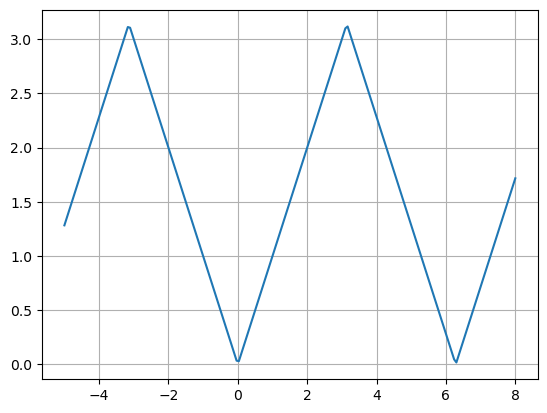

In [2]:
def f(t):
    if abs(t)>np.pi: 
        return f(abs(t)-2*np.pi)
    if (t>0)&(t<np.pi): 
        return t
    if (t<0)&(t>-np.pi): 
        return -t
    
t = np.linspace(-5,8,200)

plt.plot(t,[f(ti) for ti in t])
plt.grid()

**Exercício 1:**
Com base no exemplo acima, defina a função representada abaixo e plote seu gráfico. (Mas note que essa função **não** é simétrica em relação ao eixo $y$.)


<img src="imagens/fig2_02.png" width="360">

Note que a figura do exercício 1 pode ser uma representação para a função

$$f(t)=t, \quad 0\leq t< 3 \quad\text{e}\quad f(t+3)=f(t).$$

Uma representação mais precisa, considerando os intervalos com os extremos abertos e fechados, é mostrada no gráfico abaixo para $-3\leq x \leq 6$.



<img src="imagens/periodica.png" width="480">

In [3]:
# solução
#def h(x):
#    if x>3: 
#        return h(x%3)
#    if x<0:
#        return h(x%3+3)
#    if (x>0)&(x<3): 
#        return x
#x = np.linspace(-4.5,4.5,200)
#plt.plot(x,[h(xi) for xi in x])
#plt.grid()

In [4]:
# código para a figura
#T = 3; g = lambda x: np.mod(x, 9); I = np.linspace(-3,3)
#fig, ax = plt.subplots(figsize=(6,2))
#for n in np.unique(np.floor(I/T)):
#    x = np.linspace(0,T)
#    ax.plot(x[0:-1]-n*T,[g(xi) for xi in x[0:-1]], 'b')
#    ax.plot(x[0]-n*T, g(x[0]),marker='o',color='blue',fillstyle='full')
#    ax.plot(x[-1]-n*T, g(x[-1]),marker='o',color='blue',fillstyle='none')
#plt.grid()
#plt.savefig('periodica.png')

**Exercício 2:**

Faça o mesmo para o gráfico dado abaixo, construído a partir de uma parábola.

<center><img src="https://github.com/guerinileonardo/figures/blob/main/fig2_003.png?raw=true" width="400"></center>


Além do exemplo acima, as funções abaixo também são funções periódicas de período $T = 2\pi/ \omega $:


$$f(t)= A \,cos(\omega t + \phi)$$

e

$$f(t)= A \,sen(\omega t + \phi)$$

sendo $\phi$ o ângulo de fase, $A$ a amplitude e $\omega$ a frequência angular

Podemos criar funções periódicas combinando duas ou mais funções periódicas cujos periodos são múltiplos inteiros. Vejamos alguns exemplos:   

**Exemplo 2:** Vamos criar um sinal combinando três senoides de frequências 1, 10, 20 Hz com amplitudes de 3, 1, e 0.5, respectivamente. Consideremos uma taxa de amostragem de 200 e a duração do sinal é de 2 segundos.

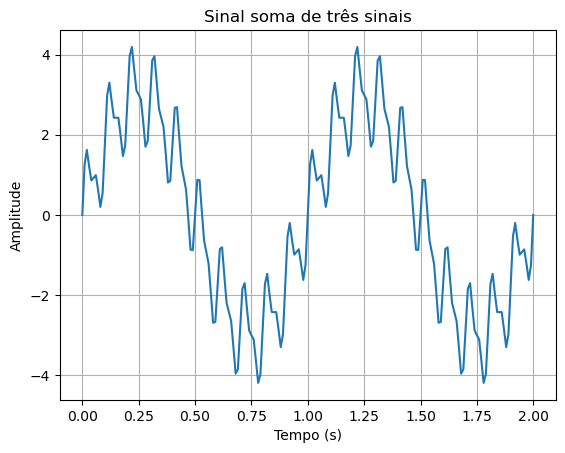

In [5]:
s = lambda A, w, t: A*np.sin(2*np.pi*w*t)

t = np.linspace(0,2,201)

plt.plot(t,s(3,1,t)+s(1,10,t)+s(0.5,20,t))

plt.xlabel( 'Tempo (s)' ) 
plt .ylabel( 'Amplitude' ) 
plt.title( 'Sinal soma de três sinais' ) 
plt.grid()
plt.show()

**Exercício 3:**

Gere um sinal formado por 3 ondas senoidais com frequências de 1 Hz, 4 Hz e 7 Hz, amplitudes 3, 1 e 0.5 e todos ângulos de fase iguais a zero. Use uma taxa de amostragem de 100 Hz (100 amostra no intervalo de tempo de 0 a 1). O resultado esperado é mostrado abaixo.


<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/fig1_02.png" width="300">


In [6]:
# Solução
#sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)
#t = np.linspace(0,1,100)
#x = sinal(3,1,t)+sinal(1,4,t)+sinal(0.5,7,t)
#plt.plot(t,x)
#plt.xlabel( 'Tempo (s)' ) 
#plt .ylabel( 'Amplitude' ) 
#plt.title( 'Sinal soma de três sinais' ) 
#plt.grid()
#plt.show()

---


Se $f$ e $g$ forem duas funções periódicas com período comum
$T$, então seu produto $fg$ e qualquer combinação linear $c_1 f + c_2 g$
também serão periódicas com período $T$. Para provar esta última
afirmação, seja $F(x) = c_1 f(x) + c_2 g(x)$, logo, para qualquer $x$,
$$F ( x + T ) = c_1 f(x+T) + c_2 g(x+T) =$$

$$= c_1 f(x) + c_2 g(x) = F(x).$$

Além disso, pode-se mostrar que a soma de qualquer número
finito, ou até a soma de uma série infinita convergente, de
funções de período T também é periódica com período T.

Em particular, as funções $sen(\frac{m \pi x}{L})$ e $cos(\frac{m \pi x}{L})$, $m =
1, 2, 3,...$, são periódicas com período fundamental $T = 2L/m$. Note também que, como todo múltiplo inteiro de um período também é um período, cada uma das funções $sen(\frac{m \pi x}{L})$ e $cos(\frac{m \pi x}{L})$ tem o período comum $2L$ ([Boyce, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/158/3:26%5Bto%20%2C%C3%A9%20a%5D))

### Funções pares e ímpares


Funções que satisfazem
$$f(-x) = f(x),$$
isto é, cujo gráfico é simétrico em relação ao eixo $y$ são chamadas **funções pares**. 

funções que satisfazem
$$f(-x) = -f(x)$$
ou seja, são simétricas em relação à origem, são chamadas **funções ímpares**.

Observe que a função cosseno é uma função par e a função seno é uma função ímpar.

Além disso, toda função real pode ser escrita de forma única como a soma de uma função ímpar e outra par.

**Exercício 4:** Identiﬁque a paridade das seguintes funções.

a) $f(x) = sen(x)+0.5sen(3x)$

b) $f(x) = cos(x)+cos(2x)$

c) $f(x) = sen(x)+e^x$

In [7]:
# solução gráfica
#f = lambda x: np.sin(x)+0.5*np.sin(3*x)
#f = lambda x: np.sin(x)*(np.e**x)
#x = np.linspace(-5,5,200)
#plt.plot(x,f(x))
#plt.grid()

---

As funções periódicas $\cos\Big(\frac{n\pi x}{L}\Big), \sin\Big(\frac{m\pi x}{L}\Big)$, com $n=0, 1, 2,...$ e $m=1, 2, 3,...$ **formam uma base ortogonal** para o espaço de funções periódicas de período $L$.

Assim, é possível mostrar que se $f$ é uma função periódica de período $L$, então $f$ pode ser escrita como combinação linear dessas funções:

$$
f(x) = \frac{a_0}{2} + \sum\limits_{n=1}^\infty\Big[a_n\cos\Big(\frac{n\pi x}{L}\Big) +b_n\sin\Big(\frac{n\pi x}{L}\Big)\Big],
$$

para algum conjunto de coeficientes $a_n, b_n$.

## Série de Fourier

Fourier mostrou que uma função periódica arbitrária pode ser representada por uma série infinita de funções senoidais com frequências harmonicamente relacionadas.

Para uma função de período T, uma série de Fourier contínua no tempo pode ser escrita como

$$f(x)= {a_0}+\sum_{k=1}^{\infty}a_k\ cos (k\omega_0 t) + b_k\ sen(k\omega_0 t)$$

onde $\omega_0 = 2\pi/T$ é chamada de frequência fundamental e os seus múltiplos constantes $2\omega_0$, $3\omega_0$, etc. são chamados de harmônicos. Logo, a função $f(t)$ é expressa como uma combinação linear das funções base: 1, $cos(\omega_0t)$, $sen(\omega_0t)$, $cos(2\omega_0t)$, $sen(2\omega_0t)$,etc.

Os coeficientes são obtidos pelas fórmulas de Euler-Fourier $a_0$, $a_n$ e $b_n$, dadas pelas equações

$$a_0= \frac{1}{T} \int_{0}^{T} f(t) dt$$

$$a_k= \frac{2}{T} \int_{0}^{T} f(t) cos(k\omega_0 t) dt$$

$$b_k= \frac{2}{T} \int_{0}^{T} f(t) sen(k\omega_0 t) dt$$

para $k=1,2,3,...$.

Desta maneira, um sinal periódico $f(t)$ pode ser representado como uma série de senos e cossenos múltiplos da frequência fundamental $\omega_0$, somados a um valor constante $a_0$

**Exemplo 3:** Suponha que existe uma série de Fourier convergindo para a função $f$ definida por

$$
\begin{gathered}
f(x)=\left\{\begin{array}{cc}
-x, & -2 \leq x<0 \\
x, & 0 \leq x<2
\end{array}\right. \\
f(x+4)=f(x)
\end{gathered}
$$


Vamos ver como são os coeficientes nesta série de Fourier e fazer o gráfico.

In [8]:
def f(x):
    if x>=2: 
        return f(x-4)
    if x<-2:
        return f(x+4)
    if (x>=-2)&(x<0): 
        return -x
    if (x>=0)&(x<2): 
        return x

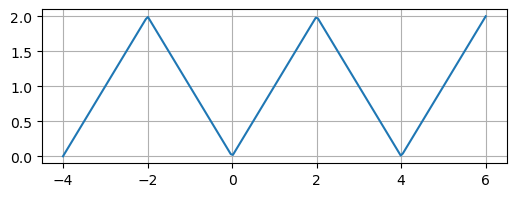

In [9]:
x = np.linspace(-4,6,200)
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

Os coeficientes são dados por 

$$
a_0=\frac{1}{2} \int_{-2}^0(-x) d x+\frac{1}{2} \int_0^2 x d x = 2
$$

$$
a_m=\frac{1}{2} \int_{-2}^0(-x) cos \left(\frac{m \pi x}{2}\right) d x+\frac{1}{2} \int_0^2 x cos \left(\frac{m \pi x}{2}\right) dx
$$

$$
=\left\{\begin{array}{cl}
-\frac{8}{(m \pi)^2}, & m \text { ímpar } \\
0, & m \text { par. }
\end{array}\right.
$$

e 

$$
b_m=\frac{1}{2} \int_{-2}^0(-x) sen \left(\frac{m \pi x}{2}\right) dx+\frac{1}{2} \int_0^2 xsen \left(\frac{m \pi x}{2}\right)dx=0
$$

As integrais podem ser obtidas usando Sympy, com a função `integrate`, por exemplo:

In [10]:
import sympy as sp
x, m, pi = sp.symbols('x m pi')

sp.integrate(-x*sp.cos(m*pi*x/2), (x,-2,0))

Piecewise((2, Eq(m, 0) | Eq(pi, 0) | (Eq(m, 0) & Eq(pi, 0))), (4*sin(m*pi)/(m*pi) + 4*cos(m*pi)/(m**2*pi**2) - 4/(m**2*pi**2), True))

Calculando as integrais, substituindo e simplificando, obtemos 
$$
f(x)=1-\frac{8}{\pi^2} \sum_{n=1}^{\infty} \frac{1}{(2 n-1)^2} \cos \left(\frac{(2 n-1) \pi x}{2}\right) .
$$

O gráfico da função e da série de fourier para 5 termos é mostrado abaixo:

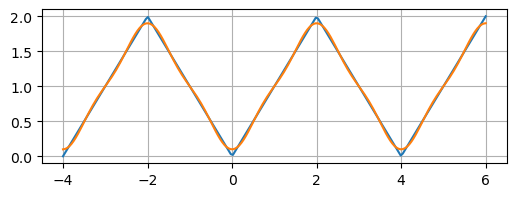

In [11]:
x = np.linspace(-4,6,200)
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x,[f(xi) for xi in x])

soma = np.zeros(len(x))
for n in range(1,3):
    soma= soma+(1/(2*n-1)**2)*np.cos((2*n-1)*np.pi*x/2)

serie = 1-(8/np.pi**2)*soma
plt.plot(x,serie)
plt.grid()

**Exemplo 4:** Modelando uma onda quadrada de período $T=1$ e amplitude $A=1$; obtendo a série de fourier com 5 termos e plotando a curva, a série e a suas componentes harmônicas. 

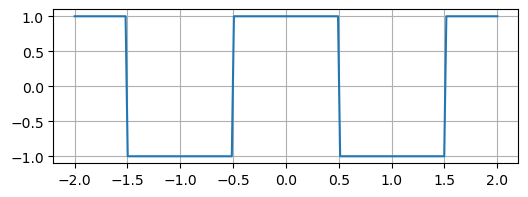

In [12]:
T = 2.0

def f(x):
    if abs(x)>T/2: 
        return f(abs(x)-T)
    if (x>-T/4)and(x<T/4): 
        return 1
    if (x<-T/4)or(x>T/4): 
        return -1
    
x = np.linspace(-T,T,200)

plt.figure(figsize = (6, 2))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

A onda quadrada par é aproximada pela série de Fourier com coeficientes $a_0=0$, $bn=0$ e 

$$
a_k=\left\{\begin{array}{cl}
4 /(k \pi) & \text { para } k=1,5,9, \ldots \\
-4 /(k \pi) & \text { para } k=3,7,11, \ldots \\
0 & \text { para } k=\text { inteiros pares }
\end{array}\right.
$$

O código abaixo pode ser usado para gerar alguns termos da série.

In [13]:
import sympy as sp
t, w0 = sp.symbols('t, w_0')
serie = 0

for n in range(1,10,2):
    serie += (-1)**(n//2)*(4/sp.pi)*sp.cos(n*w0*t)/n
serie

4*cos(t*w_0)/pi - 4*cos(3*t*w_0)/(3*pi) + 4*cos(5*t*w_0)/(5*pi) - 4*cos(7*t*w_0)/(7*pi) + 4*cos(9*t*w_0)/(9*pi)

In [14]:
s = sp.lambdify(t, serie) 

O código abaixo plota os gráficos da onda quadrada, a aproximação pos série de Fourier e as componentes harmônicas da onda (termos da série).

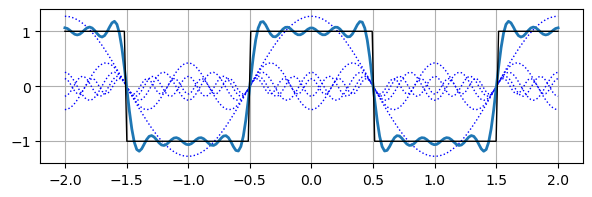

In [15]:
ti = np.linspace(-T,T,200)
soma=0
w = 2*np.pi/T

plt.figure(figsize = (7, 2))
for n in range(1,10,2):
    comp = (-1)**(n//2)*(4/np.pi)*np.cos(n*w*ti)/n
    soma += comp
    plt.plot(ti, comp, 'b:',lw=1)

plt.plot(ti, soma, lw=2)
plt.plot(x,[f(xi) for xi in x], 'k', lw=1.0)
plt.grid()
plt.show()

Notemos agora que podemos descrever uma função periódica por uma série de senos ou de cossenos em que são conhecidas as frequências e as amplitudes de cada termo, além do ângulo de fase ($\theta$).

No exemplo acima, para as amplitudes $4/\pi, -4/3\pi, 4/5\pi, -4/7\pi,...$, tem-se as frequências são determinadas por $w_0, 3w_0, 5w_0, 7w_0,...$. A figura abaixo mostra as linhas espectrais de amplitude e fase para a onda quadrada do exemplo anterior. Esta é uma forma de representar a função em termos de ampliude, frequência e fase (Fonte: [Chapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/491)).

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/linha_espectral_e_fase.png?raw=true" width="600">

In [ ]:
Em Python podemos geral as linhas espectrais de amplitude e fase como é mostrado a seguir:

In [ ]:
freq = np.arange(1,10,2)

plt.figure(figsize = (4, 2))
plt.stem(freq , abs(4/np.pi/freq), 
         markerfmt=" ", basefmt="-")

plt.xlabel( 'Frequência ($\\times f_0$)' ) 
plt.ylabel( 'Amplitude' )
plt.grid()
plt.show()

In [ ]:
freq = np.arange(1,10,2)
plt.figure(figsize = (4, 2))
plt.stem(freq , (-1)**(freq//2)>0, 
         markerfmt=".", basefmt=":")

plt.xlabel( 'Frequência ($\\times f_0$)' ) 
plt.ylabel( 'Fase (*Pi)' )
plt.grid()
plt.show()

**Exercício 5:** Um retificador de meia onda pode ser caracterizado por

$$
C_1=\left[\frac{1}{\pi}+\frac{1}{2} \operatorname{sen} t-\frac{2}{3 \pi} \cos 2 t-\frac{2}{15 \pi} \cos 4t -\frac{2}{35 \pi} \cos 6 t-\cdots\right]
$$

onde $C_1$ é a amplitude da onda. Trace os primeiros cinco termos junto à soma. Construa as linhas espectrais de amplitude e de fase. 

**Exercício 6:** Use os exemplos anteriores como modelos para fazer o gráfico da função 

$$
f(x)=\left\{\begin{array}{cc}
0, & -3<x<-1 \\
1, & -1<x<1 \\
0, & 1<x<3
\end{array}\right.
$$

supondo que $f(x + 6) = f(x)$. 

Sabendo que a série de Fourier é dada por 

$$
f(x)=\frac{1}{3}+\sum_{n=1}^{\infty} \frac{2}{n \pi} \operatorname{sen}\left(\frac{n \pi}{3}\right) \cos \left(\frac{n \pi x}{3}\right)
$$

**Exercício 7:**
A seguir é mostrado como usar integração numérica para obter uma aproximação por série de Fourier da função do primeiro exemplo. Modifique o código dado para aproximar a função da criada na **Exercício 1** deste texto. 

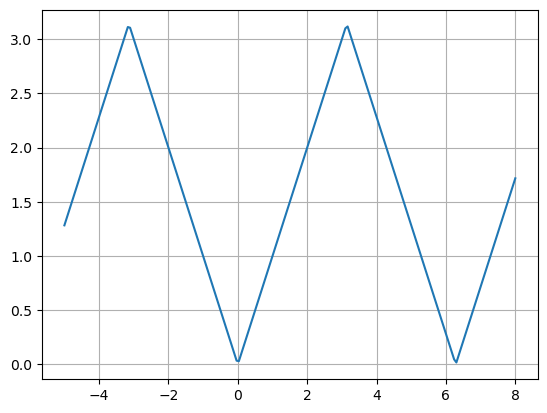

In [17]:
def f(x):
    if abs(x)>np.pi: 
        return f(abs(x)-2*np.pi)
    if (x>0)&(x<np.pi): 
        return x
    if (x<0)&(x>-np.pi): 
        return -x
    
x = np.linspace(-5,8,200)
plt.plot(x,[f(xi) for xi in x])
plt.grid()

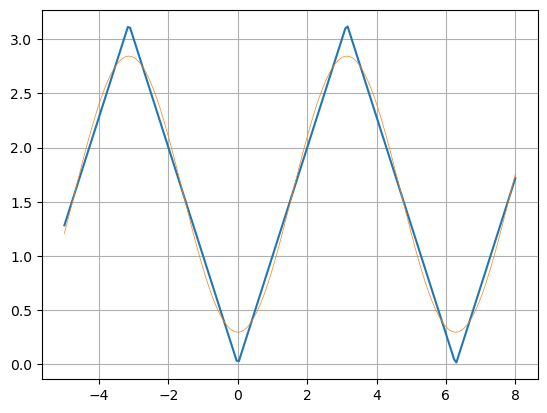

In [18]:
from scipy.integrate import quad

s = np.pi/2 

for n in range(1,3):
    An = (1/np.pi)*(quad(lambda x: -x*np.cos(n*x),-np.pi,0)[0] +\
                    quad(lambda x: x*np.cos(n*x), 0,np.pi)[0])
    Bn = (1/np.pi)*(quad(lambda x: -x*np.sin(n*x),-np.pi,0)[0] +\
                    quad(lambda x: x*np.sin(n*x), 0,np.pi)[0])
    s += An*np.cos(n*x) + Bn*np.sin(n*x)
plt.plot(x,[f(xi) for xi in x])
plt.plot(x,s, lw=0.5)
plt.grid()

In [19]:
# solução
#from scipy.integrate import quad
#s = 3/2
#w = 2*np.pi/3
#for n in range(1,10):
#    An = (2/3)*(quad(lambda x: h(x)*np.cos(w*n*x),0,np.pi)[0])
#    Bn = (2/3)*(quad(lambda x: h(x)*np.sin(w*n*x),0,np.pi)[0])
#    s += An*np.cos(w*n*x) + Bn*np.sin(w*n*x)
#plt.plot(x,[g(xi) for xi in x],'--')
#plt.plot(x,s, "r", lw=0.5)
#plt.grid()

### Referências

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. 

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. DOI: https://doi.org/10.1016/C2018-0-04165-1

LANGTANGEN, Hans Pette. A Primer on Scientific Programming with Python. Texts in Computational Science and Engineering. Springer Berlin, Heidelberg, ed 5, 2016. DOI: https://doi.org/10.1007/978-3-662-49887-3
